In [1]:
import os
os.getcwd()

'/Users/ashkapathak/mstc-ml-woc'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/raw/placement.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  str    
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  str    
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  str    
dtypes: float64(2), int64(5), str(3)
memory usage: 781.4 KB


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['college_id', 'iq', 'prev_sem_result', 'cgpa', 'academic_performance',
       'internship_experience', 'extra_curricular_score',
       'communication_skills', 'projects_completed', 'placement'],
      dtype='str')

In [7]:
df.isnull().sum()

college_id                0
iq                        0
prev_sem_result           0
cgpa                      0
academic_performance      0
internship_experience     0
extra_curricular_score    0
communication_skills      0
projects_completed        0
placement                 0
dtype: int64

In [8]:
if "salary" in df.columns and "status" in df.columns:
    df[df["salary"].isnull()]["status"].value_counts()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.to_csv("data/processed/placement_cleaned.csv", index=False)
print("Saved: data/processed/placement_cleaned.csv")

Saved: data/processed/placement_cleaned.csv


In [11]:
df.describe()

,iq,prev_sem_result,cgpa,academic_performance,extra_curricular_score,communication_skills,projects_completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [12]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numeric_cols, categorical_cols

/var/folders/qq/8bcr50w550j43rd45hxp1h8w0000gn/T/ipykernel_46172/3900102453.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=["object"]).columns


(Index(['iq', 'prev_sem_result', 'cgpa', 'academic_performance',
        'extra_curricular_score', 'communication_skills', 'projects_completed'],
       dtype='str'),
 Index(['college_id', 'internship_experience', 'placement'], dtype='str'))

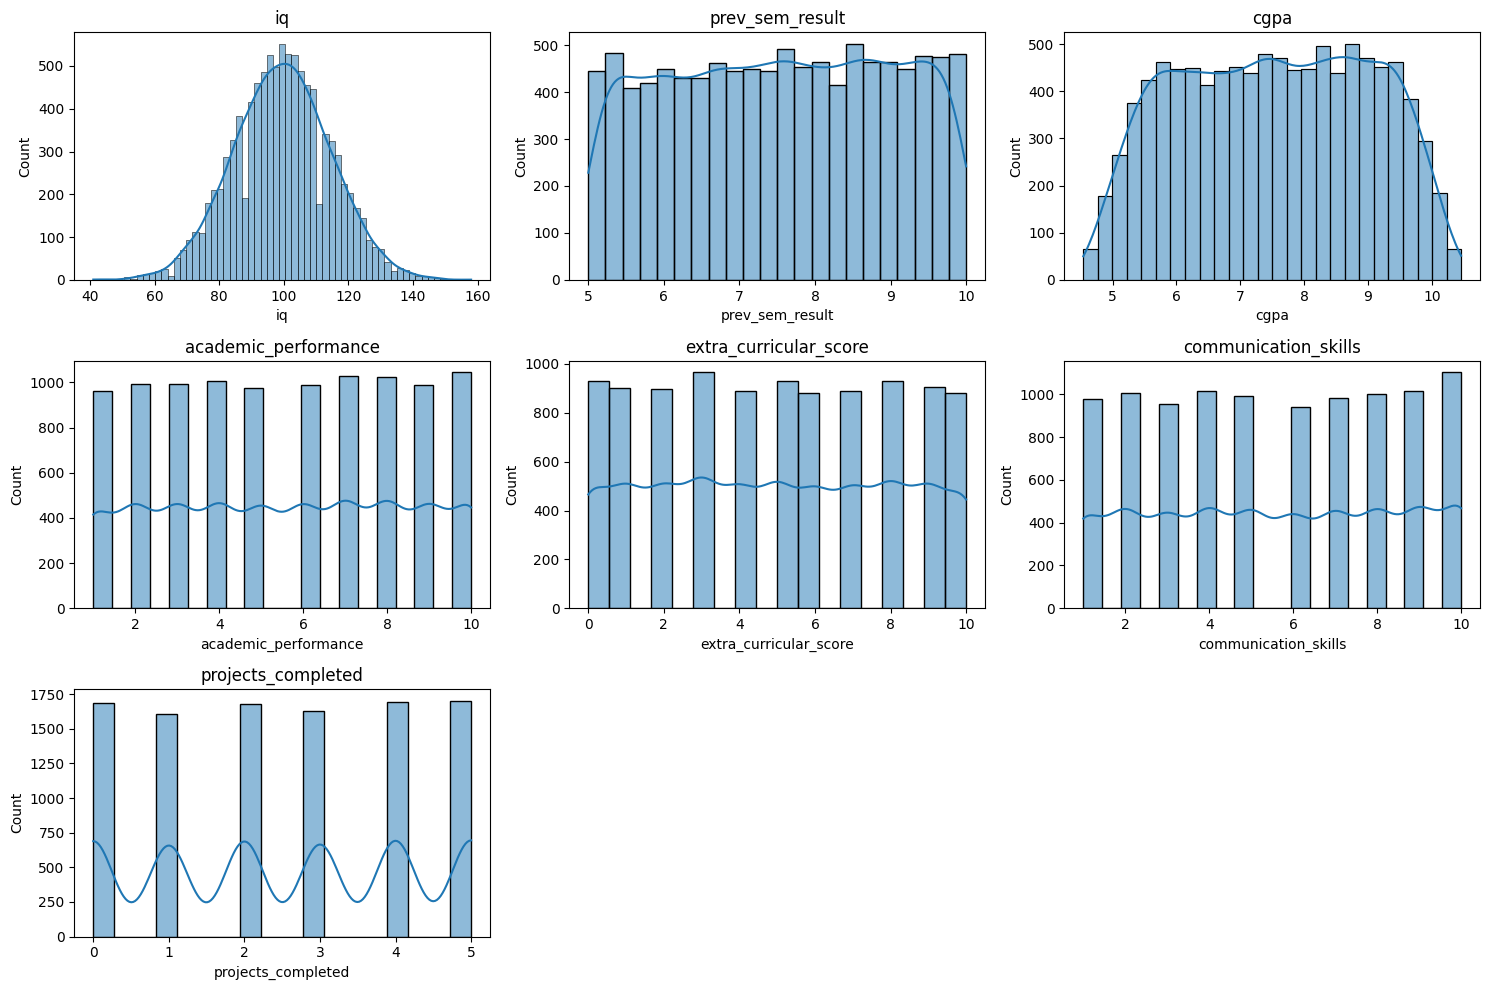

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

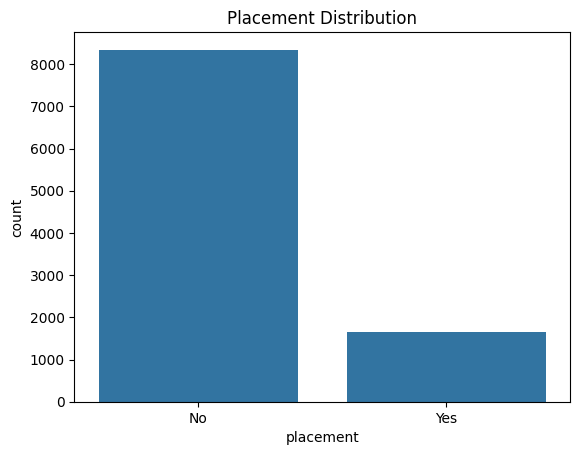

In [14]:
sns.countplot(x="placement", data=df)
plt.title("Placement Distribution")
plt.show()

From analysing the dataset, a few clear patterns emerge. The dataset consists of 10,000 student records with a mix of academic, skill-based, and experiential features, making it well-suited for analysing placement outcomes.
Most academic indicators, such as IQ, CGPA, previous-semester results, and academic performance, follow a smooth distribution, suggesting the data is well-balanced and free of extreme outliers. Skill-related attributes, such as communication skills and extracurricular scores, are evenly distributed across their ranges, indicating consistent variation among students.
The placement outcome shows a meaningful relationship with performance-oriented features. Students with higher CGPA, stronger academic performance, and better communication skills appear more likely to be placed. Internship experience stands out as an important differentiating factor, with students who have prior internship exposure showing higher placement rates.
Overall, the exploratory analysis suggests that while academic consistency forms a strong foundation for placement, practical exposure and soft skills play a crucial role in improving placement outcomes. These insights provide a clear direction for feature selection and model building in the following stages of the project.

In [15]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,iq,prev_sem_result,cgpa,academic_performance,extra_curricular_score,communication_skills,projects_completed
iq,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538
prev_sem_result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
cgpa,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872
academic_performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148
extra_curricular_score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122
communication_skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486
projects_completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000


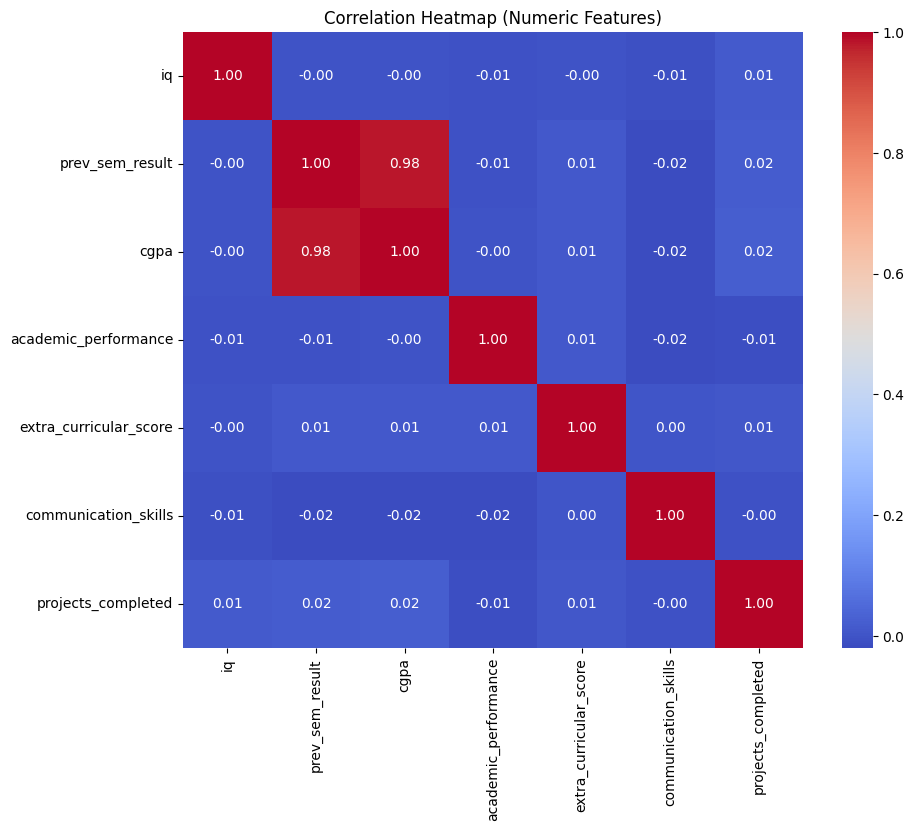

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [17]:
df["placement_binary"] = df["placement"].str.lower().map({"yes": 1, "no": 0})
df[numeric_cols.tolist() + ["placement_binary"]].corr()["placement_binary"].sort_values(ascending=False)

placement_binary          1.000000
communication_skills      0.323155
cgpa                      0.321607
prev_sem_result           0.317896
iq                        0.285914
projects_completed        0.217499
extra_curricular_score   -0.004740
academic_performance     -0.014920
Name: placement_binary, dtype: float64

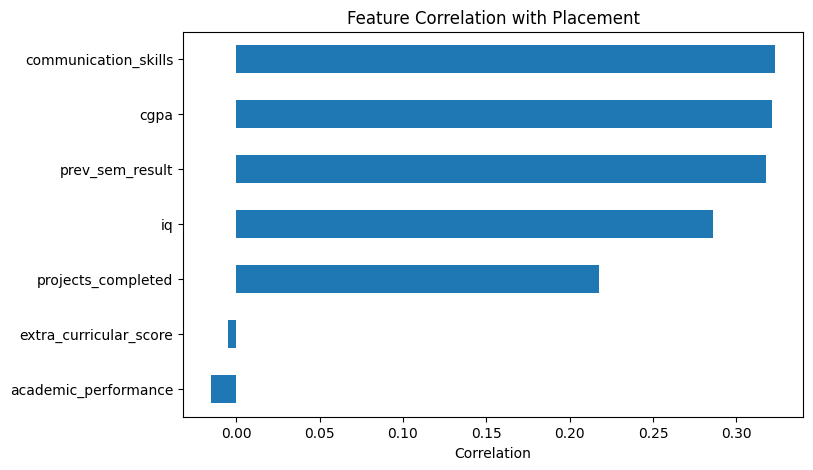

In [18]:
plt.figure(figsize=(8, 5))
df[numeric_cols.tolist() + ["placement_binary"]].corr()["placement_binary"][:-1].sort_values().plot(kind="barh")
plt.title("Feature Correlation with Placement")
plt.xlabel("Correlation")
plt.show()

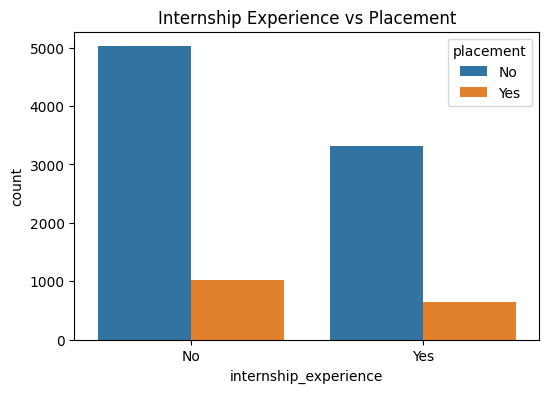

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x="internship_experience", hue="placement", data=df)
plt.title("Internship Experience vs Placement")
plt.show()

The correlation analysis shows that most numeric features are weakly correlated, indicating low multicollinearity across the dataset. An exception to this is the very strong positive correlation observed between previous-semester results and CGPA, which is expected, as both metrics capture similar aspects of academic performance.
The correlation heatmap suggests that academic performance indicators largely behave independently of skill-based and experiential features, such as communication skills, extracurricular scores, and projects completed. This separation highlights that the dataset captures multiple dimensions of a student’s profile rather than redundant information.
Visual analysis of placement outcomes reveals a clear class imbalance, with a larger proportion of students not being placed. This imbalance is important to account for during model building and evaluation. Additionally, internship experience shows a strong relationship with placement outcomes: students with prior internship experience tend to have higher placement counts than those without experience.
Overall, the exploratory analysis indicates that placement outcomes are influenced by a combination of academic consistency and practical exposure rather than by any single feature in isolation. These observations provide a strong basis for feature engineering and supervised model development in the subsequent stages.